In [1]:
with open('articles.txt', 'r') as f:
    data_in = f.read()
articles = data_in.split('@@')

print (len(articles))

900


In [2]:
nonempty = []
for article in articles:
    if len(article) > 0:
        nonempty.append(article)
articles = nonempty

len(articles)

282

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(articles)

np.shape(X)

(282, 22092)

In [125]:
from sklearn.metrics.pairwise import pairwise_distances


distances = np.asmatrix(1 - pairwise_distances(X, metric='cosine'))
print distances
print type(distances)


[[ 1.          0.23522446  0.09619863 ...,  0.31972099  0.31223294
   0.31348767]
 [ 0.23522446  1.          0.0770423  ...,  0.23414962  0.23490204
   0.21763925]
 [ 0.09619863  0.0770423   1.         ...,  0.10042689  0.12961937
   0.07878973]
 ..., 
 [ 0.31972099  0.23414962  0.10042689 ...,  1.          0.26591199
   0.22623655]
 [ 0.31223294  0.23490204  0.12961937 ...,  0.26591199  1.          0.33942941]
 [ 0.31348767  0.21763925  0.07878973 ...,  0.22623655  0.33942941  1.        ]]
<class 'numpy.matrixlib.defmatrix.matrix'>


In [126]:
import networkx as nx

np.shape(distances)
distances[distances < 0.3] = 0
np.fill_diagonal(distances, 0)
distances




matrix([[ 0.        ,  0.        ,  0.        , ...,  0.31972099,
          0.31223294,  0.31348767],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.31972099,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.31223294,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.33942941],
        [ 0.31348767,  0.        ,  0.        , ...,  0.        ,
          0.33942941,  0.        ]])

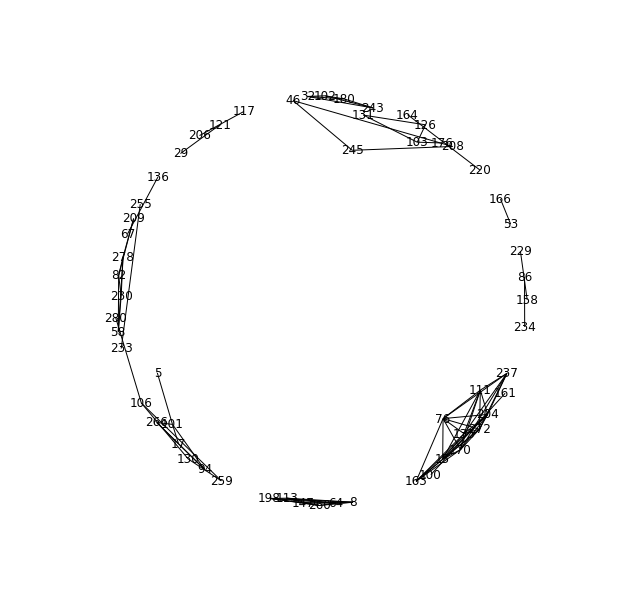

In [130]:
import matplotlib.pyplot as plt
% matplotlib inline


subgraph_nodes = []
for node in G.nodes():
    if G.degree(node) > 0:
        subgraph_nodes.append(node)

Gstar = G.subgraph(subgraph_nodes)
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
nx.draw_spring(Gstar, node_shape='.', with_labels=True, node_size=0, label_pos=1)

In [128]:
counter = 0
for component in nx.components.connected.connected_components(Gstar):
    data_out = []
    for node in component:
        data_out.append(articles[node])
        data_out.append('\n\n\n\n')
    filename = "clusters/" +str(counter) + ".txt"
    counter += 1
    with open(filename, 'w+') as f:
        f.write(''.join(data_out))